In [70]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

<font color=green>Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

<font color=green>Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

<font color=green>Objetivos:
- Buscar un conjunto de datos a analizar
- Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los resultados.

In [71]:
df = pd.read_csv('Datos/Travel_Insurance.csv', index_col=0)
df.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


In [72]:
df.rename(columns = {'Employment Type':'Employment_Type', 'GraduateOrNot':'Graduate_Or_Not', 'AnnualIncome':'Annual_Income', 'FamilyMembers':'Family_Members', 
                     'ChronicDiseases':'Chronic_Diseases', 'FrequentFlyer':'Frequent_Flyer','EverTravelledAbroad':'Ever_Travelled_Abroad', 'TravelInsurance':'Travel_Insurance'}, inplace=True)

In [73]:
df.shape

(1987, 9)

In [74]:
df.dtypes

Age                       int64
Employment_Type          object
Graduate_Or_Not          object
Annual_Income             int64
Family_Members            int64
Chronic_Diseases          int64
Frequent_Flyer           object
Ever_Travelled_Abroad    object
Travel_Insurance          int64
dtype: object

#### <font color=violet>Análisis exploratorio.

Hacemos una pequeña descripción de las variables de nuestro dataset:

- `AGE`: Edad del empleado.
- `EMPLOYMENT_TYPE`: Si pertenece al gobierno o al sector privado.
- `GRADUATE_OR_NOT`: Si es graduado o no.
- `ANNUAL_INCOME`: Ingresos anuales
- `FAMILY_MENBERS`: Número de los miembros de la familia.
- `CHRONIC_DISEASES`: Si tiene enfermedades crónicas.
- `FRECUENT_FLYER`: Si es viajero frecuente.
- `EVER_TRAVELLED_ABROAD`: Si ha viajado al extranjero.
- `TRAVEL_INSURANCE`: Si tiene seguro de viaje o no. 0 = No, 1 = Si

Vemos los valores únicos de cada variable.

In [75]:
df.Age.unique()

array([31, 34, 28, 25, 33, 26, 32, 29, 35, 30, 27])

In [76]:
df.Employment_Type.unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [77]:
df.Graduate_Or_Not.unique()

array(['Yes', 'No'], dtype=object)

In [78]:
df.Annual_Income.unique()

array([ 400000, 1250000,  500000,  700000, 1150000, 1300000, 1350000,
       1450000,  800000, 1400000,  850000, 1500000, 1050000,  350000,
       1100000,  600000,  900000,  550000,  300000,  750000, 1200000,
       1000000,  950000, 1700000, 1750000,  650000,  450000, 1650000,
       1800000, 1550000])

In [79]:
df.Family_Members.unique()

array([6, 7, 4, 3, 8, 9, 5, 2])

In [80]:
df.Chronic_Diseases.unique()

array([1, 0])

In [81]:
df.Frequent_Flyer.unique()

array(['No', 'Yes'], dtype=object)

In [82]:
df.Ever_Travelled_Abroad.unique()

array(['No', 'Yes'], dtype=object)

In [83]:
df.Travel_Insurance.unique()

array([0, 1])

- Vemos si tenemos nulos.

In [84]:
df.isnull().sum()

Age                      0
Employment_Type          0
Graduate_Or_Not          0
Annual_Income            0
Family_Members           0
Chronic_Diseases         0
Frequent_Flyer           0
Ever_Travelled_Abroad    0
Travel_Insurance         0
dtype: int64

- Vemos si tenemos duplicados.

In [85]:
df.duplicated().sum()

738

- Eliminamos los duplicados.

In [86]:
df = df.drop_duplicates()

In [87]:
df.shape

(1249, 9)

- Principales estadísticos de las variables numéricas

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1249.0,29.755805,2.921039,25.0,28.0,29.0,32.0,35.0
Annual_Income,1249.0,934547.638110,360729.284255,300000.0,600000.0,900000.0,1200000.0,1800000.0
Family_Members,1249.0,4.890312,1.762313,2.0,4.0,5.0,6.0,9.0
Chronic_Diseases,1249.0,0.333066,0.471499,0.0,0.0,0.0,1.0,1.0
Travel_Insurance,1249.0,0.386709,0.487191,0.0,0.0,0.0,1.0,1.0


- Principales estadísticos de las variables categóricas

In [89]:
df.describe(include ="object").T

,count,unique,top,freq
Employment_Type,1249,2,Private Sector/Self Employed,876
Graduate_Or_Not,1249,2,Yes,1047
Frequent_Flyer,1249,2,No,954
Ever_Travelled_Abroad,1249,2,No,1005


- Vemos el tipo de datos de cada columna.

In [90]:
df.dtypes

Age                       int64
Employment_Type          object
Graduate_Or_Not          object
Annual_Income             int64
Family_Members            int64
Chronic_Diseases          int64
Frequent_Flyer           object
Ever_Travelled_Abroad    object
Travel_Insurance          int64
dtype: object

- Transformamos las columnas Employment_Type, Graduate_Or_Not, Frequent_Flyer, Ever_Travelled_Abroad a tipo categórico.

In [91]:
df = df.astype({'Employment_Type':'category', 'Graduate_Or_Not':'category', 'Frequent_Flyer':'category', 'Ever_Travelled_Abroad':'category', 'Family_Members':'category','Chronic_Diseases':'category'})

- Verificamos nuevamente el tipo de datos de cada columna.

In [92]:
df.dtypes

Age                         int64
Employment_Type          category
Graduate_Or_Not          category
Annual_Income               int64
Family_Members           category
Chronic_Diseases         category
Frequent_Flyer           category
Ever_Travelled_Abroad    category
Travel_Insurance            int64
dtype: object

#### <font color=violet>Análisis exploratorio visual.

- ### Variable respuesta

Hemos decidido que nuestra variable respuesta será `Travel_insurance` 0 = No tiene seguro de viaje, 1 = Si tiene seguro de viaje.

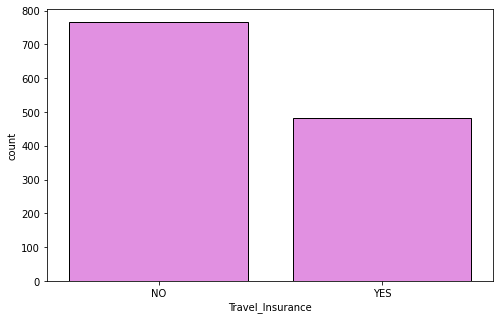

In [93]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "Travel_Insurance",  color = "violet",  edgecolor='black')
fig1.set(xticklabels=["NO", "YES"]) 
plt.show();

- Sacamos el porcentaje de cada respuesta.

In [94]:
df["Travel_Insurance"].value_counts() / df.shape[0]

0    0.613291
1    0.386709
Name: Travel_Insurance, dtype: float64

Esto significa que el 39% de los empleados tiene seguro de viaje.

- ### Variables catégoricas

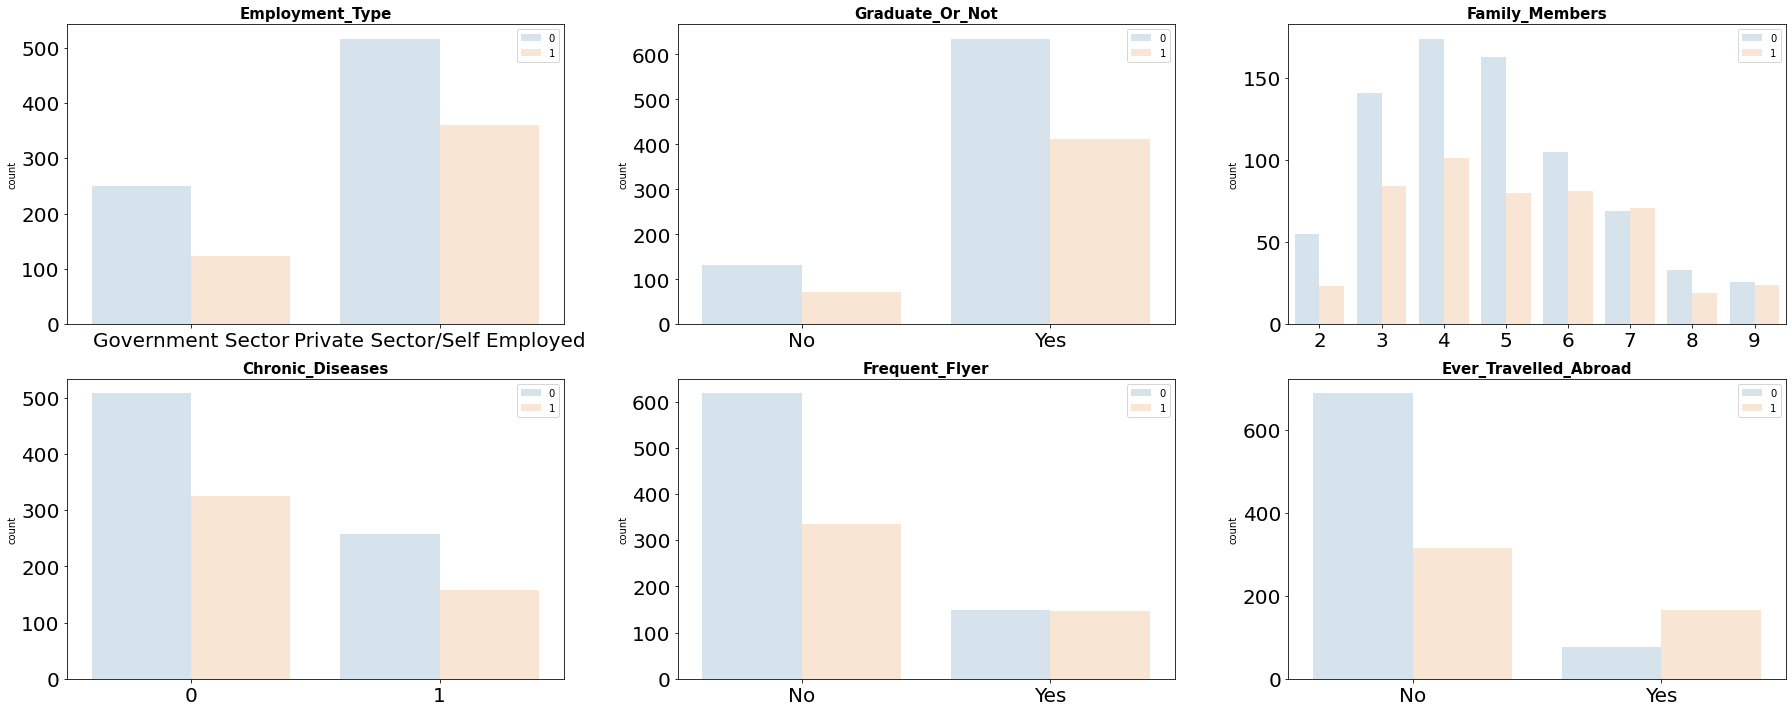

In [95]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (25, 10))


axes = axes.flat
columnas_cat = df.select_dtypes(include = "category").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Travel_Insurance",
        alpha = 0.2, 
        ax = axes[i]
        )
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

Las principales conclusiones del análisis de las variables categóricas son: 

- Son más los empleados del sector privado/autónomos y claramente se ve que de ambos sectores son más los que no tienen seguro de viaje.
- Son más los graduados y tambien se observa que de los graduados como de los que no, son más los que no tienen seguro de viaje.
- Hay mayor cantidad de viajeros no frecuentes y de estos son más los que no tienen seguro de viaje y de los viajeros frecuentes se ve que por igual que tienen o no seguro de viaje.
- Son más los que no han viajado al exterior y vemos de estos, que la mayoría no tiene seguro de viaje y de los que han viajado al exterior la mayoría si tiene seguro de viaje.
- 

- ### Variables continuas

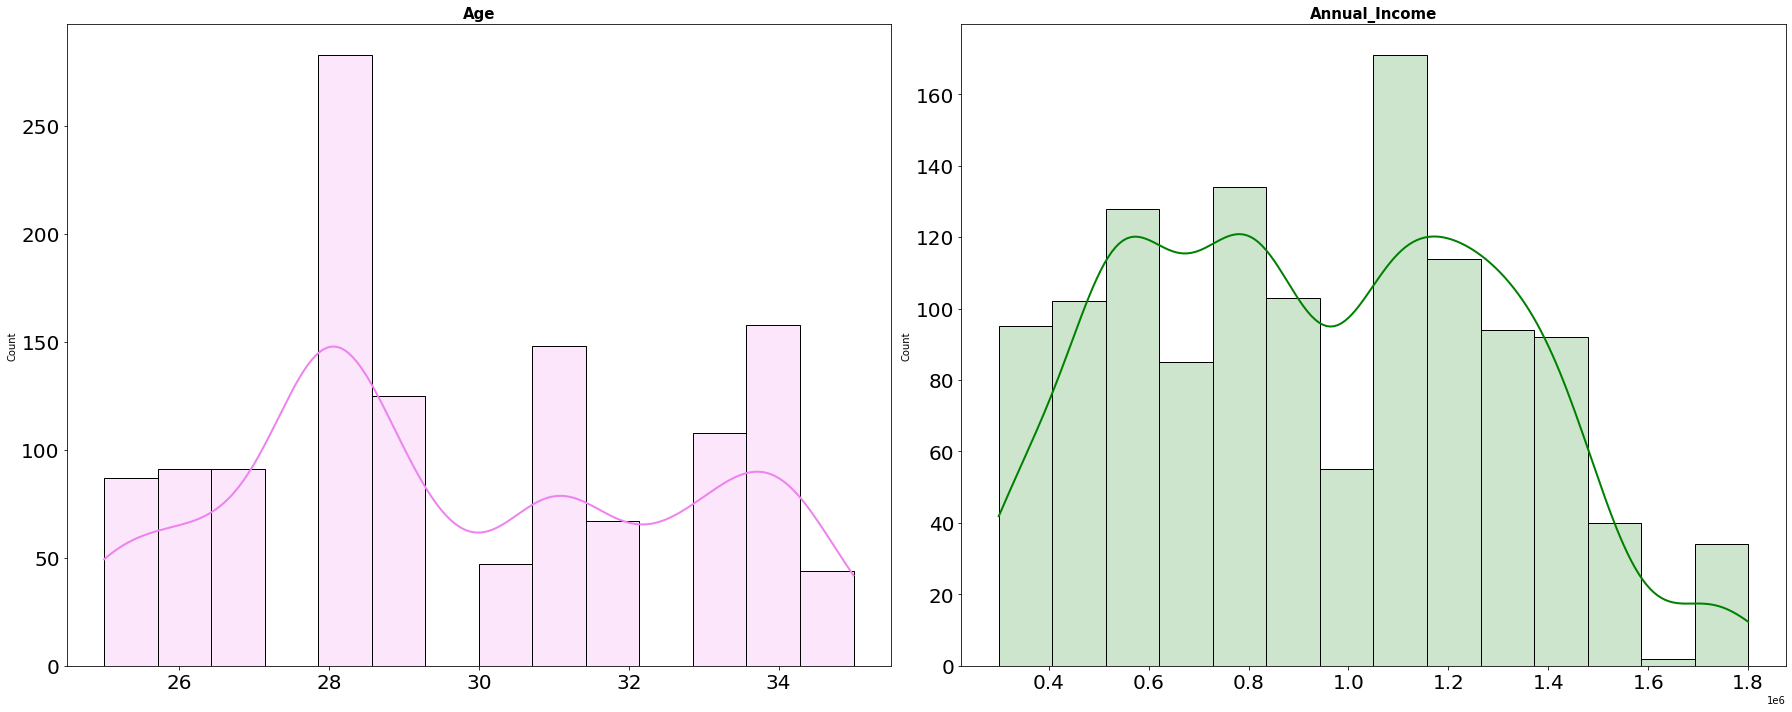

In [96]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 10))

lista_colores = ["violet", "green"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Travel_Insurance")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

Las principales conclusiones del análisis de las variables numéricas son: 
- La mayoría de los empleados tienen 28, 31 y 34 años.
- El sueldo de los empleados es muy variado, pero la mayor cantidad de empleados gana aprox 1.2 millones anuales.
- Hay más familias de 3,4 y 5 miembros.
- La mayoría de los empleados no tiene enfermedades crónicas.

- Heatmap: Para saber la relación entre las variables dependientas o predictoras:

In [97]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head()

,Age,Annual_Income,Travel_Insurance
0,31,400000,0
1,31,1250000,0
2,34,500000,1
3,28,700000,0
4,28,700000,0


In [98]:
# creamos la matriz de correlación
correlacion = df_numericas.corr()
correlacion

,Age,Annual_Income,Travel_Insurance
Age,1.000000,-0.005029,0.067536
Annual_Income,-0.005029,1.000000,0.293913
Travel_Insurance,0.067536,0.293913,1.000000


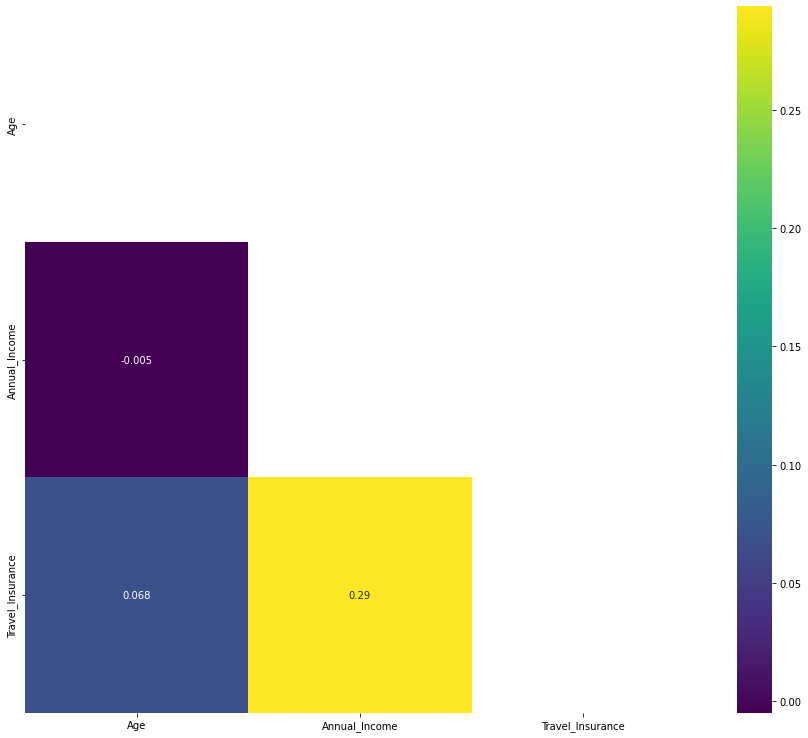

In [99]:
plt.figure(figsize=(15,13))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

Ninguna de nuestras variables tiene un valor de correlación mayor que 0.7 o menor que -0.7, por lo tanto, no eliminaremos ninguna columna. 

### <font color=violet> Preprocesamiento

- Chequeamos los outliers

In [100]:
numericas = df.select_dtypes(np.number)
numericas.head(2)

,Age,Annual_Income,Travel_Insurance
0,31,400000,0
1,31,1250000,0


In [101]:
categoricas = df.select_dtypes(include=['category'])
categoricas.head(2)

,Employment_Type,Graduate_Or_Not,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad
0,Government Sector,Yes,6,1,No,No
1,Private Sector/Self Employed,Yes,7,0,No,No


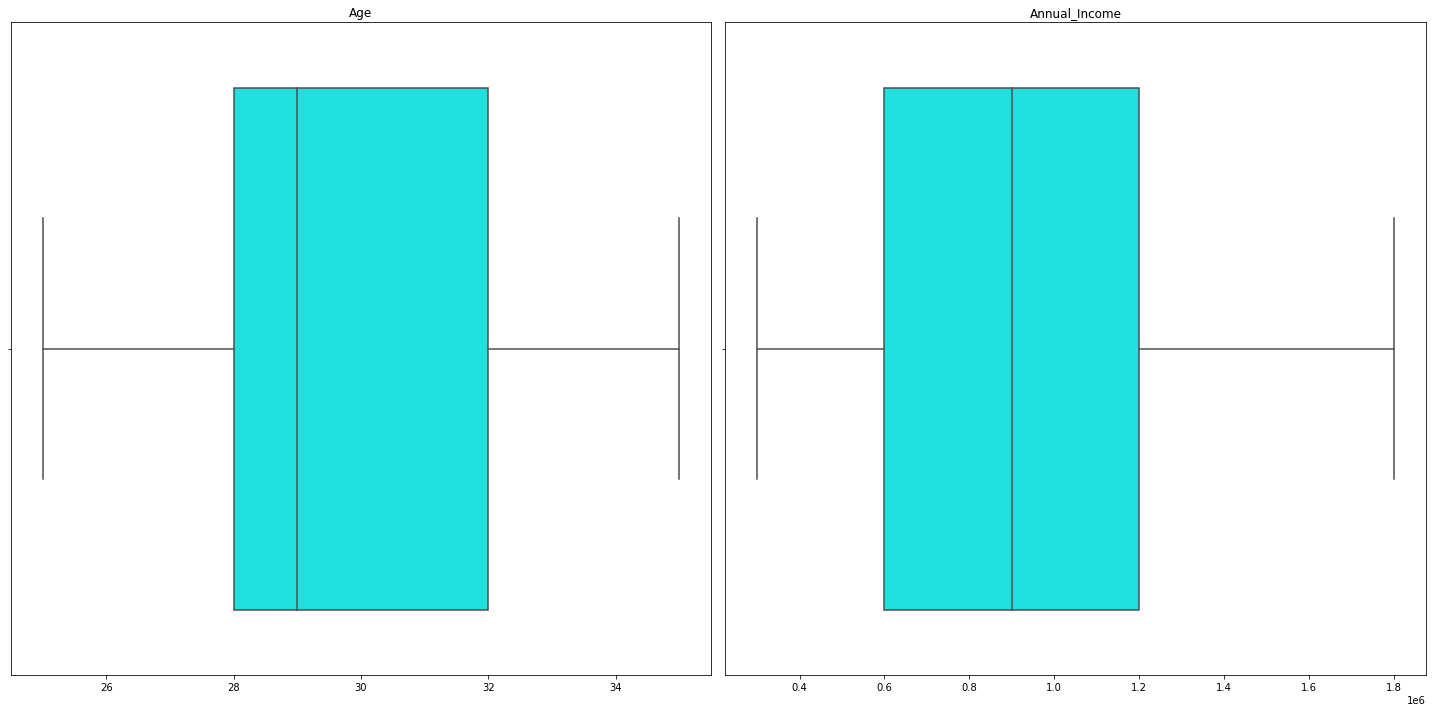

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

categorias = df_numericas.drop("Travel_Insurance", axis = 1).columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout(); 

No tenemos outliers así que todo bien!!! Seguimos!!!

Guardamos el pickle para seguir usándolo en próximas lecciones.

In [103]:
df.to_pickle("Datos/Travel_Insurance_limpio.pkl")